# Introduction

For this project, I decided to analyze the lyrics of British new wave band, "Depeche Mode." They have changed their sound numerous times over their 40+ year career, but most of their songs with themes such as politics, religion, love, and lust to varying degrees of ambiguity. They have also been able to make many chart-topping hits and successful albums despite (or even because of) their dark tone and remain one of my favorite bands to this day. 

Through this analysis, I hope to see if the sentiment of Depeche Mode lyrics falls in line with my perception of the band, that they make music with dark, underlying meanings. I also want to see if the tone of their songs affects the popularity of their albums. 

This report will seek to answer the following questions:

1. What is the overall sentiment of Depeche Mode's discography?

2. How does the sentiment change from album to album?

3. Does the sentiment of the album correlate with the popularity of that album?

4. What are the most frequent words in each album and do the results reflect the sentiment of the album?

# Data Preparation

## Scraping the Lyrics

The main data set used for this project was the song lyrics from Depeche Mode's 14 studio albums (released from 1980 to 2017). I used the original track listing for each album (not including instrumentals) for a total of 145 songs. I decided to focus of the albums rather than the songs themselves for two reasons:

1. Like most bands, songs are often re-released or remastered on live/compilation albums, and I did not want any duplicates.

2. Also like most bands with a worldwide following, track listings can vary wildly for country to country. 

By focusing solely on the original track listings, I hope to better capture the sentiment of each album.  

To obtain the lyrics, I scraped them from the website "lyrics.com", which has the lyrics of every Depeche Mode song (including re-releases). For each album, I created a list of URLs and used a self-made function to iterate through the list, scraping the lyrics from each URL with BeautifulSoup. 

In [1]:
# Modules required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
from bs4 import BeautifulSoup
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

'''
Used package called "gensim" to tokenize words. Needs to be installed to anaconda via the terminal
Is good at dealing with words with apostrophes (i.e. can't)
Consulted the following sources
https://radimrehurek.com/gensim/
https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4
'''
from gensim.utils import tokenize


In [2]:
# List of urls for the 1st album (Speak and Spell) 
# 11 Songs
album1 = ["https://www.lyrics.com/lyric/24390393/Depeche+Mode/New+Life",
        "https://www.lyrics.com/lyric/28263846/Depeche+Mode/I+Sometimes+Wish+I+Was+Dead",
        "https://www.lyrics.com/lyric/24390395/Depeche+Mode/Puppets",
        "https://www.lyrics.com/lyric/24390394/Depeche+Mode/Dreaming+of+Me",
        "https://www.lyrics.com/lyric/24390392/Depeche+Mode/Boys+Say+Go%21",
        "https://www.lyrics.com/lyric/24390391/Depeche+Mode/Nodisco",
        "https://www.lyrics.com/lyric/24390390/Depeche+Mode/What%27s+Your+Name%3F",
        "https://www.lyrics.com/lyric/24390389/Depeche+Mode/Photographic",
        "https://www.lyrics.com/lyric/24390388/Depeche+Mode/Tora%21+Tora%21+Tora%21",
        "https://www.lyrics.com/lyric/28263874/Depeche+Mode/Any+Second+Now+%28Voices%29",
        "https://www.lyrics.com/lyric/28263870/Depeche+Mode/Just+Can%27t+Get+Enough"]

In [3]:
# List of urls for 2nd album (A Broken Frame)
# 9 Songs
album2 = ["https://www.lyrics.com/lyric/30636056/Depeche+Mode/Leave+In+Silence",
        "https://www.lyrics.com/lyric/30636055/Depeche+Mode/My+Secret+Garden",
        "https://www.lyrics.com/lyric/30636054/Depeche+Mode/Monument",
        "https://www.lyrics.com/lyric/1537870/Depeche+Mode/See+You",
        "https://www.lyrics.com/lyric/30636051/Depeche+Mode/Satellite",
        "https://www.lyrics.com/lyric/30636050/Depeche+Mode/The+Meaning+of+Love",
        "https://www.lyrics.com/lyric/30636049/Depeche+Mode/A+Photograph+of+You",
        "https://www.lyrics.com/lyric/30636048/Depeche+Mode/Shouldn%27t+Have+Done+That",
        "https://www.lyrics.com/lyric/1537876/Depeche+Mode/The+Sun+%26+The+Rainfall"]

In [4]:
# List of urls for the 3rd album (Construction Time Again)
# 9 Songs
album3 = ["https://www.lyrics.com/lyric/24390405/Depeche+Mode/Love+in+Itself",
         "https://www.lyrics.com/lyric/30699959/Depeche+Mode/More+Than+a+Party",
         "https://www.lyrics.com/lyric/30699958/Depeche+Mode/Pipeline",
         "https://www.lyrics.com/lyric/30699957/Depeche+Mode/Everything+Counts",
         "https://www.lyrics.com/lyric/30699956/Depeche+Mode/Two+Minute+Warning",
         "https://www.lyrics.com/lyric/30699955/Depeche+Mode/Shame",
         "https://www.lyrics.com/lyric/30699954/Depeche+Mode/The+Landscape+is+Changing",
         "https://www.lyrics.com/lyric/30699953/Depeche+Mode/Told+You+So",
         "https://www.lyrics.com/lyric/30699952/Depeche+Mode/And+Then..."]

In [5]:
# List of urls for the 4th album (Some Great Reward)
# 9 Songs
album4 = ["https://www.lyrics.com/lyric/30423840/Depeche+Mode/Something+To+Do",
         "https://www.lyrics.com/lyric/30423839/Depeche+Mode/Lie+To+Me",
         "https://www.lyrics.com/lyric/30423838/Depeche+Mode/People+Are+People",
         "https://www.lyrics.com/lyric/30423837/Depeche+Mode/It+Doesn%27t+Matter",
         "https://www.lyrics.com/lyric/30423836/Depeche+Mode/Stories+Of+Old",
         "https://www.lyrics.com/lyric/30423835/Depeche+Mode/Somebody",
         "https://www.lyrics.com/lyric/30423834/Depeche+Mode/Master+And+Servant",
         "https://www.lyrics.com/lyric/30423833/Depeche+Mode/If+You+Want",
         "https://www.lyrics.com/lyric/30423832/Depeche+Mode/Blasphemous+Rumours"]

In [6]:
# List of urls for the 5th album (Black Celebration)
# 11 Songs
album5 = ["https://www.lyrics.com/lyric/30423565/Depeche+Mode/Black+Celebration",
         "https://www.lyrics.com/lyric/26724736/Depeche+Mode/Fly+on+the+Windscreen-Final",
         "https://www.lyrics.com/lyric/30423563/Depeche+Mode/A+Question+Of+Lust",
         "https://www.lyrics.com/lyric/30423562/Depeche+Mode/Sometimes",
         "https://www.lyrics.com/lyric/28853064/Depeche+Mode/It+Doesn%27t+Matter+Two",
         "https://www.lyrics.com/lyric/26725972/Depeche+Mode/Question+of+Time",
         "https://www.lyrics.com/lyric/30423559/Depeche+Mode/Stripped",
         "https://www.lyrics.com/lyric/30423558/Depeche+Mode/Here+Is+The+House",
         "https://www.lyrics.com/lyric/30423557/Depeche+Mode/World+Full+Of+Nothing",
         "https://www.lyrics.com/lyric/30423556/Depeche+Mode/Dressed+In+Black",
         "https://www.lyrics.com/lyric/30423555/Depeche+Mode/New+Dress"]

In [7]:
# List of urls for the 6th album (Music for the Masses)
# 9 Songs
album6 = ["https://www.lyrics.com/lyric/30423770/Depeche+Mode/Never+Let+Me+Down+Again",
         "https://www.lyrics.com/lyric/30423769/Depeche+Mode/The+Things+You+Said",
         "https://www.lyrics.com/lyric/30423768/Depeche+Mode/Strangelove",
         "https://www.lyrics.com/lyric/30423767/Depeche+Mode/Sacred",
         "https://www.lyrics.com/lyric/30423766/Depeche+Mode/Little+15",
         "https://www.lyrics.com/lyric/30423765/Depeche+Mode/Behind+The+Wheel",
         "https://www.lyrics.com/lyric/30423764/Depeche+Mode/I+Want+You+Now",
         "https://www.lyrics.com/lyric/30423763/Depeche+Mode/To+Have+And+To+Hold",
         "https://www.lyrics.com/lyric/30423762/Depeche+Mode/Nothing"]

In [8]:
# List of urls for the 7th album (Violator)
# 9 Songs
album7 = ["https://www.lyrics.com/lyric/4212468/Depeche+Mode/World+in+My+Eyes",
         "https://www.lyrics.com/lyric/4212469/Depeche+Mode/Sweetest+Perfection",
         "https://www.lyrics.com/lyric/4212470/Depeche+Mode/Personal+Jesus",
         "https://www.lyrics.com/lyric/4212471/Depeche+Mode/Halo",
         "https://www.lyrics.com/lyric/4212472/Depeche+Mode/Waiting+for+the+Night",
         "https://www.lyrics.com/lyric/4212473/Depeche+Mode/Enjoy+the+Silence",
         "https://www.lyrics.com/lyric/4212474/Depeche+Mode/Policy+of+Truth",
         "https://www.lyrics.com/lyric/4212475/Depeche+Mode/Blue+Dress",
         "https://www.lyrics.com/lyric/4212476/Depeche+Mode/Clean"]

In [9]:
# List of urls for the 8th album (Songs of Faith and Devotion)
# 10 Songs
album8 = ["https://www.lyrics.com/lyric/621568/Depeche+Mode/I+Feel+You",
         "https://www.lyrics.com/lyric/30423553/Depeche+Mode/Walking+In+My+Shoes",
         "https://www.lyrics.com/lyric/30423552/Depeche+Mode/Condemnation",
         "https://www.lyrics.com/lyric/30423551/Depeche+Mode/Mercy+In+You",
         "https://www.lyrics.com/lyric/30423550/Depeche+Mode/Judas",
         "https://www.lyrics.com/lyric/30423549/Depeche+Mode/In+Your+Room",
         "https://www.lyrics.com/lyric/30423548/Depeche+Mode/Get+Right+With+Me",
         "https://www.lyrics.com/lyric/30423547/Depeche+Mode/Rush",
         "https://www.lyrics.com/lyric/30423546/Depeche+Mode/One+Caress",
         "https://www.lyrics.com/lyric/30423545/Depeche+Mode/Higher+Love"]

In [10]:
# List of urls for the 9th album (Ultra)
# 9 Songs
album9 = ["https://www.lyrics.com/lyric/26398869/Depeche+Mode/Barrel+of+a+Gun",
         "https://www.lyrics.com/lyric/24535718/Depeche+Mode/The+Love+Thieves",
         "https://www.lyrics.com/lyric/26398357/Depeche+Mode/Home",
         "https://www.lyrics.com/lyric/26399574/Depeche+Mode/It%27s+No+Good",
         "https://www.lyrics.com/lyric/26396986/Depeche+Mode/Useless",
         "https://www.lyrics.com/lyric/26398391/Depeche+Mode/Sister+of+Night",
         "https://www.lyrics.com/lyric/26399038/Depeche+Mode/Freestate",
         "https://www.lyrics.com/lyric/24535710/Depeche+Mode/The+Bottom+Line",
         "https://www.lyrics.com/lyric/26399255/Depeche+Mode/Insight"]

In [11]:
# List of urls for the 10th album (Exciter)
# 11 Songs
album10 = ["https://www.lyrics.com/lyric/4801283/Depeche+Mode/Dream+On",
          "https://www.lyrics.com/lyric/4801284/Depeche+Mode/Shine",
          "https://www.lyrics.com/lyric/4801285/Depeche+Mode/The+Sweetest+Condition",
          "https://www.lyrics.com/lyric/34025812/Depeche+Mode/When+the+Body+Speaks",
          "https://www.lyrics.com/lyric/34025811/Depeche+Mode/The+Dead+of+Night",
          "https://www.lyrics.com/lyric/34025809/Depeche+Mode/Freelove",
          "https://www.lyrics.com/lyric/34025808/Depeche+Mode/Comatose",
          "https://www.lyrics.com/lyric/4801291/Depeche+Mode/I+Feel+Loved",
          "https://www.lyrics.com/lyric/34025806/Depeche+Mode/Breathe",
          "https://www.lyrics.com/lyric/34025804/Depeche+Mode/I+Am+You",
          "https://www.lyrics.com/lyric/34025803/Depeche+Mode/Goodnight+Lovers"]

In [12]:
# List of urls for the 11th album (Playing the Angel)
# 11 Songs
album11 = ["https://www.lyrics.com/lyric/33628323/Depeche+Mode/A+Pain+That+I%27m+Used+To",
          "https://www.lyrics.com/lyric/33628322/Depeche+Mode/John+the+Revelator",
          "https://www.lyrics.com/lyric/33628321/Depeche+Mode/Suffer+Well",
          "https://www.lyrics.com/lyric/33628320/Depeche+Mode/The+Sinner+in+Me",
          "https://www.lyrics.com/lyric/33628319/Depeche+Mode/Precious",
          "https://www.lyrics.com/lyric/33628318/Depeche+Mode/Macro",
          "https://www.lyrics.com/lyric/33628317/Depeche+Mode/I+Want+It+All",
          "https://www.lyrics.com/lyric/33628316/Depeche+Mode/Nothing%27s+Impossible",
          "https://www.lyrics.com/lyric/33628314/Depeche+Mode/Damaged+People",
          "https://www.lyrics.com/lyric/33628313/Depeche+Mode/Lilian",
          "https://www.lyrics.com/lyric/33628312/Depeche+Mode/The+Darkest+Star"]

In [13]:
# List of urls for the 12th album (Sounds of the Universe)
# 12 Songs
album12 = ["https://www.lyrics.com/lyric/33628281/Depeche+Mode/In+Chains",
          "https://www.lyrics.com/lyric/33628280/Depeche+Mode/Hole+to+Feed",
          "https://www.lyrics.com/lyric/33628279/Depeche+Mode/Wrong",
          "https://www.lyrics.com/lyric/33628278/Depeche+Mode/Fragile+Tension",
          "https://www.lyrics.com/lyric/33628277/Depeche+Mode/Little+Soul",
          "https://www.lyrics.com/lyric/33628276/Depeche+Mode/In+Sympathy",
          "https://www.lyrics.com/lyric/33628275/Depeche+Mode/Peace",
          "https://www.lyrics.com/lyric/33628274/Depeche+Mode/Come+Back",
          "https://www.lyrics.com/lyric/16265383/Depeche+Mode/Perfect",
          "https://www.lyrics.com/lyric/33628271/Depeche+Mode/Miles+Away-The+Truth+Is",
          "https://www.lyrics.com/lyric/33628270/Depeche+Mode/Jezebel",
          "https://www.lyrics.com/lyric/33628269/Depeche+Mode/Corrupt"]

In [14]:
# List of urls for the 13th album (Delta Machine)
# 13 Songs
album13 = ["https://www.lyrics.com/lyric/28908542/Depeche+Mode/Welcome+to+My+World",
          "https://www.lyrics.com/lyric/28908541/Depeche+Mode/Angel",
          "https://www.lyrics.com/lyric/28908540/Depeche+Mode/Heaven",
          "https://www.lyrics.com/lyric/28908539/Depeche+Mode/Secret+to+the+End",
          "https://www.lyrics.com/lyric/28908538/Depeche+Mode/My+Little+Universe",
          "https://www.lyrics.com/lyric/28908537/Depeche+Mode/Slow",
          "https://www.lyrics.com/lyric/28908536/Depeche+Mode/Broken",
          "https://www.lyrics.com/lyric/28908535/Depeche+Mode/The+Child+Inside",
          "https://www.lyrics.com/lyric/28908534/Depeche+Mode/Soft+Touch-Raw+Nerve",
          "https://www.lyrics.com/lyric/28908533/Depeche+Mode/Should+Be+Higher",
          "https://www.lyrics.com/lyric/28908532/Depeche+Mode/Alone",
          "https://www.lyrics.com/lyric/28908531/Depeche+Mode/Soothe+My+Soul",
          "https://www.lyrics.com/lyric/28908530/Depeche+Mode/Goodbye"]

In [15]:
# List of urls for the 14th album (Spirit)
# 12 Songs
album14 = ["https://www.lyrics.com/lyric/33723663/Depeche+Mode/Going+Backwards",
          "https://www.lyrics.com/lyric/33723662/Depeche+Mode/Where%27s+the+Revolution",
          "https://www.lyrics.com/lyric/33723661/Depeche+Mode/The+Worst+Crime",
          "https://www.lyrics.com/lyric/33723660/Depeche+Mode/Scum",
          "https://www.lyrics.com/lyric/33723659/Depeche+Mode/You+Move",
          "https://www.lyrics.com/lyric/33723658/Depeche+Mode/Cover+Me",
          "https://www.lyrics.com/lyric/33723657/Depeche+Mode/Eternal",
          "https://www.lyrics.com/lyric/33723656/Depeche+Mode/Poison+Heart",
          "https://www.lyrics.com/lyric/33723655/Depeche+Mode/So+Much+Love",
          "https://www.lyrics.com/lyric/33723664/Depeche+Mode/Poorman",
          "https://www.lyrics.com/lyric/33723654/Depeche+Mode/No+More+%28This+Is+the+Last+Time%29",
          "https://www.lyrics.com/lyric/33723653/Depeche+Mode/Fail"]

In [16]:
# Scrapes the lyrics for each url in the given url list 
def lyricscraper(urllist):
    lyriclist = []
    for song in urllist:
        # Parses through the url
        response = request.urlopen(song)
        html = response.read().decode('utf8')
        htmlsoup = BeautifulSoup(html, 'html.parser')
        
        # All the song lyrics are in the "pre" key
        pre = htmlsoup.find_all('pre')
        lyrics = str(pre[0].text)
        
        # Removes new line symbols from the text string
        lyrics = lyrics.replace('\n', ' ')
        lyrics = lyrics.replace('\n\n', ' ')
        lyrics = lyrics.replace('\r', '')
        
        # Adds the string to the lyrics list for that album
        lyriclist.append(lyrics)
        
    return(lyriclist)


In [17]:
# Scrapes the lyrics for each album list
speakandspell = lyricscraper(album1)
abrokenframe = lyricscraper(album2)
constructiontimeagain = lyricscraper(album3)
somegreatreward = lyricscraper(album4)
blackcelebration = lyricscraper(album5)
musicforthemasses = lyricscraper(album6)
violator = lyricscraper(album7)
songsoffaithanddevotion = lyricscraper(album8)
ultra = lyricscraper(album9)
exciter = lyricscraper(album10)
playingtheangel = lyricscraper(album11)
soundsoftheuniverse = lyricscraper(album12)
deltamachine = lyricscraper(album13)
spirit = lyricscraper(album14)

In [18]:
# Defines a list of all the albums
depechemode = [speakandspell, abrokenframe, constructiontimeagain, somegreatreward, blackcelebration, 
               musicforthemasses, violator, songsoffaithanddevotion, ultra, exciter, playingtheangel, 
               soundsoftheuniverse, deltamachine, spirit]

In [19]:
depechemode[3]

["My little girl Won't you come with me Come with me And tell me  Is there something to do  I'm going crazy with boredom Come with me Tell me  Grey sky over a black town I can feel depression  All around You've got your leather boots on  I can't stand another drink It's surprising this town Doesn't sink You've got your leather boots on  Your pretty dress is oil stained From working too hard For too little You've got your leather boots on  You're feeling the boredom too I'd gladly go with you I'd put your leather boots on I'd put your pretty dress on ",
 "[Chorus: x2] Come on and lay with me Come on and lie to me Tell me you love me Say I'm the only one  Experiences have a lasting impression But words once spoken Don't mean a lot now Belief is the way The way of the innocent And when I say innocent I should say naive So lie to me But do it with sincerity Make me listen Just for a minute Make me think There's some truth in it  [Chorus: x2]  Promises made for convenience Aren't necessaril

In [20]:
depechemode[13]

["We are not there yet We have not evolved We have no respect We have lost control We're going backwards Ignoring the realities Going backwards Are you counting all the casualties?  We are not there yet Where we need to be We are still in debt To our insanities We're going backwards Turning back our history Going backwards Piling on the misery  We can track it all with satellites See it all in plain sight Watch men die in real time But we have nothing inside We feel nothing inside  We are not there yet We have lost our soul The course has been set We're digging our own hole We're going backwards Armed with new technology Going backwards To a caveman mentality  We can emulate on consoles Killings we can control With senses that have been dulled Because there's nothing inside We feel nothing inside  We feel nothing inside (We feel nothing, nothing inside) We feel nothing inside (We feel nothing, nothing inside) We feel nothing inside (We feel nothing, nothing inside) We feel nothing insi

## Chart Website Scraping

To answer one of the data questions, we need to find the chart performance of each Depeche Mode album. For this, I scraped album data from another website:

http://archives.depechemode.com/discography/

Each URL contains the top chart position for the album in both the UK and the US. I created a function (like the one I used for the lyrics) to scrape the album name, the UK chart position, and the US chart position for the website and append them to a corresponding list. 

One of the albums (Construction Time Again) did not chart in the US, so I had to create a separate unique function that would only scrape the album name and the UK chart position. I then inserted those values into the lists mentioned above (placing a "Nan" value for the US chart position). 

In [21]:
charts = ['http://archives.depechemode.com/discography/albums/01_speakandspell.html',
          'http://archives.depechemode.com/discography/albums/02_abrokenframe.html',
          'http://archives.depechemode.com/discography/albums/05_somegreatreward.html',
          'http://archives.depechemode.com/discography/albums/08_blackcelebration.html',
          'http://archives.depechemode.com/discography/albums/09_musicforthemasses.html',
          'http://archives.depechemode.com/discography/albums/11_violator.html',
          'http://archives.depechemode.com/discography/albums/12_songsoffaithanddevotion.html',
          'http://archives.depechemode.com/discography/albums/14_ultra.html',
          'http://archives.depechemode.com/discography/albums/17_exciter.html',
          'http://archives.depechemode.com/discography/albums/19_playingtheangel.html',
          'http://archives.depechemode.com/discography/albums/21_soundsoftheuniverse.html',
          'http://archives.depechemode.com/discography/albums/23_deltamachine.html',
          'http://archives.depechemode.com/discography/albums/25_spirit.html']

chartsuk = 'http://archives.depechemode.com/discography/albums/03_constructiontimeagain.html'


In [22]:
def chartscraper(url):
    response = request.urlopen(url)
    html = response.read().decode('utf8')
    htmlsoup = BeautifulSoup(html, 'html.parser')
    p = htmlsoup.find_all('p')
    chart = str(p[2].text)
    chart = chart.replace('\n\n', '')
    name, uk, us = chart.split('\n')
    uktxt, uknum = uk.split(': ')
    ustxt, usnum = us.split(': ')
    
    
    return(name, uknum, usnum)

In [23]:
# One of the albums (Construction Time Again) only charted in the UK so this function is for that url
def ukonly(url):
    response = request.urlopen(url)
    html = response.read().decode('utf8')
    htmlsoup = BeautifulSoup(html, 'html.parser')
    p = htmlsoup.find_all('p')
    chart = str(p[2].text)
    chart = chart.replace('\n\n', '')
    name, uk = chart.split('\n')
    uktxt, uknum = uk.split(': ')
    
    return(name, uknum)

In [24]:
name = []
uknum = []
usnum = []
for url in charts:
    name.append(chartscraper(url)[0])
    uknum.append(float(chartscraper(url)[1]))
    usnum.append(float(chartscraper(url)[2]))      

In [25]:
name.insert(2, ukonly(chartsuk)[0])
uknum.insert(2, float(ukonly(chartsuk)[1]))
usnum.insert(2, None)


## Sentiment Analysis

The most important component of this report is the sentiment analysis done on the lyrics. NLTK's Sentiment Intensity Analyzer was used for this report. Given a list of sentences, this analyzer will return four values:

Negative Score (0 to 1): Indicates the percentage of the sentence that has a negative sentiment.

Neutral Score (0 to 1): Indicates the percentage of the sentence that has a neutral sentiment.

Positive Score (0 to 1): Indicates the percentage of the sentence that has a positive sentiment.

Compound Score (-1 to 1): Indicates the overall sentiment of the sentence with anything less than 0 being negative and anything greater than zero being positive.

One of the limitations of performing sentiment analysis on song lyrics is that they are not structured like most text. Like poetry, songs often lack the punctual and grammatical structure of something like a novel. Therefore, rather than trying to put each song into a sentence format, I will treat the lyrics of the entire song as one sentence so each song will have a sentiment score in the four categories listed above. 

Using the Sentiment Analyzer, I will create eight lists, two for each of the score types with one containing all 145 songs and the other containg the average score for each album.


In [26]:
# Create lists to store sentiment for each song
# By averaging these lists, we will find the overall sentiment of Depeche Mode
dmneg = []
dmneu = []
dmpos = []
dmcomp = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

# Iterate for each word in the album and append the scores
for album in depechemode:
    for song in album:
        scores = sid.polarity_scores(song)
        dmneg.append(scores['neg'])
        dmneu.append(scores['neu'])
        dmpos.append(scores['pos'])
        dmcomp.append(scores['compound'])
    


In [27]:
# These list will store the average sentiment scores for each album
aneg = []
aneu = []
apos = []
acomp = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

# Iterate for each word in the album and append the scores
for album in depechemode:
    neg = []
    neu = []
    pos = []
    comp = []
    for song in album:
        scores = sid.polarity_scores(song)
        neg.append(scores['neg'])
        neu.append(scores['neu'])
        pos.append(scores['pos'])
        comp.append(scores['compound'])
        
    aneg.append(np.mean(neg))
    aneu.append(np.mean(neu))
    apos.append(np.mean(pos))
    acomp.append(np.mean(comp))

## Creating a Pandas Dataframe for Analysis

To help in analyzing the data, I took all the data thus far and put it into a Pandas data frame. The columns (not including the index) will be:

Album: The name of the album

UK: The top position of the album on the UK Charts

USA: The top position of the album on the USA Charts

Negative: The negative sentiment score of each album

Neutral: The neutral sentiment score of each album

Positive: The positive sentiment score of each album

Compound: The compound sentiment score of each album


In [28]:
dmdata = pd.DataFrame({'Album': name, 'UK': uknum, 'USA': usnum, 'Negative': aneg, 'Neutral': aneu, 
                       'Positive': apos, 'Compound': acomp})
dmdata

,Album,UK,USA,Negative,Neutral,Positive,Compound
0,Speak And Spell,6.0,19.0,0.050182,0.826818,0.122818,0.401964
1,A Broken Frame,8.0,177.0,0.094333,0.755889,0.150000,0.454511
2,Construction Time Again,6.0,NaN,0.133222,0.770000,0.096667,-0.196167
3,Some Great Reward,5.0,51.0,0.083111,0.728333,0.188778,0.551444
4,Black Celebration,3.0,90.0,0.075909,0.813000,0.110909,0.327291
5,Music For The Masses,10.0,35.0,0.086333,0.744333,0.169778,0.424478
6,Violator,2.0,7.0,0.077000,0.800444,0.122667,0.388622
7,Songs Of Faith And Devotion,1.0,1.0,0.097600,0.722800,0.179300,0.633520
8,Ultra,1.0,5.0,0.117333,0.748000,0.134667,0.203578
9,Exciter,9.0,8.0,0.146364,0.677273,0.176364,0.153482


## Tokenization

Since most of the examples of sensitivity analysis we have seen in class were untokenized, I decided to leave the lyrics mostly unaltered up until this point. But to answer my final analysis question, some tokenization needs to be done. For each song, I wanted to tokenize the lyrics, remove all stop words, and remove any non-alphabetic characters.
I created a function called "tokenize" that would accomplish all these steps and called it for each album.

One of the problems I ran into when trying to use nltk's tokenization function was that it did not deal with apostrophes that well. For example, in the song "Just Can't Get Enough" from the first album, the stop word "can't" is repeated multiple times. The tokenizer would treat "can," and "'t" as two separate words, and while "can" and "t" are both recognized stop words the apostrophe was not removed from the t. So, the word "'t" kept appearing in the tokenized word list.

After some research (sources listed at the end of the paper) I found a tokenization package called "gensim" that was able to tokenize words with apostrophes more accurately. 

In [29]:
# Stores all english stopwords, which will be removed during tokenization
nltk_stopwords = nltk.corpus.stopwords.words('english')

# Removes all non-alphabetic characters (will be used in tokenization)
def alpha_filter(w):
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [30]:
def tokenizer(album):
    # Uses gensim to tokenize (coverts all words to lowercase)
    all_tokens = [tok.lower() for song in album for tok in tokenize(song)]
    # Filters out stop words
    filtered_tokens = [tok for tok in all_tokens if not tok in nltk_stopwords]
    # Removes all non-alphabetical characters
    token_list = [tok for tok in filtered_tokens if not alpha_filter(tok)]
    
    return(token_list)

In [31]:
speakandspell = tokenizer(speakandspell)
abrokenframe = tokenizer(abrokenframe)
constructiontimeagain = tokenizer(constructiontimeagain)
somegreatreward = tokenizer(somegreatreward)
blackcelebration = tokenizer(blackcelebration)
musicforthemasses = tokenizer(musicforthemasses)
violator = tokenizer(violator)
songsoffaithanddevotion = tokenizer(songsoffaithanddevotion)
ultra = tokenizer(ultra)
exciter = tokenizer(exciter)
playingtheangel = tokenizer(playingtheangel)
soundsoftheuniverse = tokenizer(soundsoftheuniverse)
deltamachine = tokenizer(deltamachine)
spirit = tokenizer(spirit)

In [32]:
dmtoken = [speakandspell, abrokenframe, constructiontimeagain, somegreatreward, blackcelebration, 
               musicforthemasses, violator, songsoffaithanddevotion, ultra, exciter, playingtheangel, 
               soundsoftheuniverse, deltamachine, spirit]

# Data Questions

## 1. What is the overall sentiment of Depeche Mode's discography?

During the sentiment analysis portion of the data preparation, I mentioned I created four lists, each containing a respective sentiment score for each song. By averaging these lists, we can find the overall sentiment of their music.

In [33]:
print('Total Negative Sentiment Score: ', np.mean(dmneg))
print('Total Neutral Sentiment Score: ', np.mean(dmneu))
print('Total Positive Sentiment Score: ', np.mean(dmpos))
print('Total Compound Sentiment Score: ', np.mean(dmcomp))

Total Negative Sentiment Score:  0.10508275862068966
Total Neutral Sentiment Score:  0.7531172413793104
Total Positive Sentiment Score:  0.14184137931034482
Total Compound Sentiment Score:  0.24148551724137932


The overall sentiment of Depeche Modes discography is slightly positive with a compound sentiment score of 0.24, which goes against my initial assumption of the band's material. Through answering the other questions, I hope to shed light on this result.

## 2. How does the sentiment change from album to album?

The following plots graph the mean scores for each of the sentiment categories by album.

(0.0, 0.15)

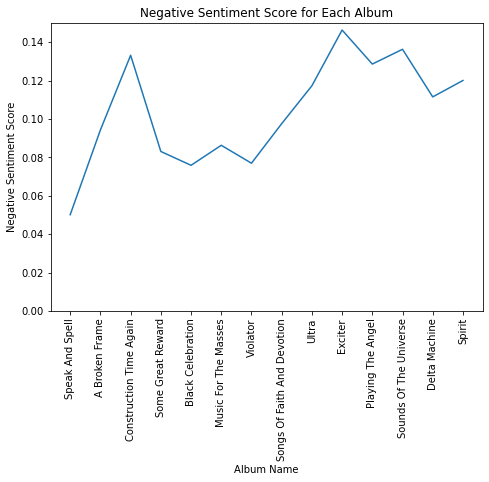

In [34]:
negative = dmdata.Negative

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

negative.plot()

ax.set_xticks(range(14))

ax.set_xticklabels(dmdata.Album, rotation=90, fontsize='medium')
ax.set_title('Negative Sentiment Score for Each Album')

ax.set_xlabel('Album Name')
ax.set_ylabel('Negative Sentiment Score')

plt.ylim(0,0.15)

Except for the third album, there is a gradual increase in the negative sentiment score across the albums. The album with the highest score is the 10th album (Exciter) at around 14% while the lowest was the first album (Speak and Spell) at around 5%.

(0.0, 0.2)

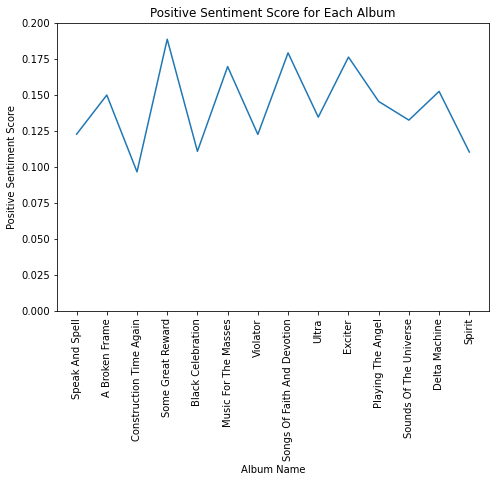

In [35]:
positive = dmdata.Positive

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

positive.plot()

ax.set_xticks(range(14))

ax.set_xticklabels(dmdata.Album, rotation=90, fontsize='medium')
ax.set_title('Positive Sentiment Score for Each Album')

ax.set_xlabel('Album Name')
ax.set_ylabel('Positive Sentiment Score')

plt.ylim(0,0.2)

The positive sentiment percentage seems to be more random than the negative percentage, fluctuating between 10 to 20 percent of the album. "Some Great Reward" had the highest percentage (around 19%) while "Construction Time Again" had the lowest (around 9%).


To get a better idea of the difference in positive and negative sentiment for each album, I have created a scatterplot where the positive score is the x-axis, and the negative score is the y-axis.

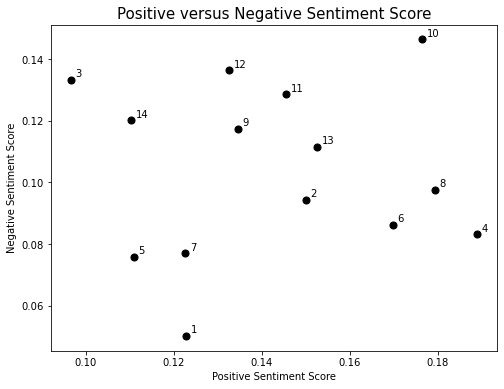

In [36]:
# The following is a modified version of similar code from the following webdsite
# https://www.delftstack.com/howto/matplotlib/matplotlib-label-scatter-plot-points/
annotations=['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

plt.figure(figsize = (8,6))
plt.scatter(dmdata.Positive, dmdata.Negative, s = 50, color = 'black')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Negative Sentiment Score')
plt.title('Positive versus Negative Sentiment Score', fontsize = 15)
for i, label in enumerate(annotations):
    plt.annotate(label, (dmdata.Positive[i] + 0.001, dmdata.Negative[i] + 0.001))

plt.show()

This graph shows that there is some correlation between the positive and negative scores, but four albums don't fit the trend. Album's 1, 5, and 7 have low percentages in both categories while album 10 has a relatively high percentage in both categories. 

(0.0, 0.85)

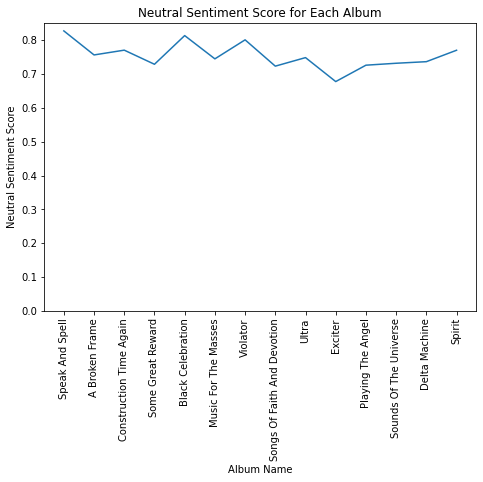

In [37]:
neutral = dmdata.Neutral

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

neutral.plot()

ax.set_xticks(range(14))

ax.set_xticklabels(dmdata.Album, rotation=90, fontsize='medium')
ax.set_title('Neutral Sentiment Score for Each Album')

ax.set_xlabel('Album Name')
ax.set_ylabel('Neutral Sentiment Score')

plt.ylim(0,0.85)

Although the neutral sentimet of the albums is not too important, but it's worth mentioning that this makes up at least 65% of all the album's content. 

(-0.4, 0.7)

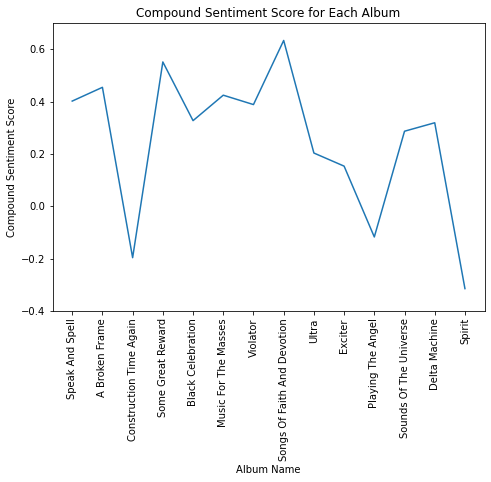

In [38]:
compound = dmdata.Compound

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

compound.plot()

ax.set_xticks(range(14))

ax.set_xticklabels(dmdata.Album, rotation=90, fontsize='medium')
ax.set_title('Compound Sentiment Score for Each Album')

ax.set_xlabel('Album Name')
ax.set_ylabel('Compound Sentiment Score')

plt.ylim(-0.4,0.7)

This chart confirms that the majority of Depeche Mode's discography has a positive sentiment. Only three albums (Construction Time Again, Playing the Angel, and Spirit) have a negative compound score. 

## 3. Does the sentiment of the album reflect the popularity of the album?

To answer this question, I created two scatterplots (one for the UK and one for the US) where the x-axis is the compound sentiment score, and the y-axis is the album's chart position. The lower the dot is, the higher that album charted.

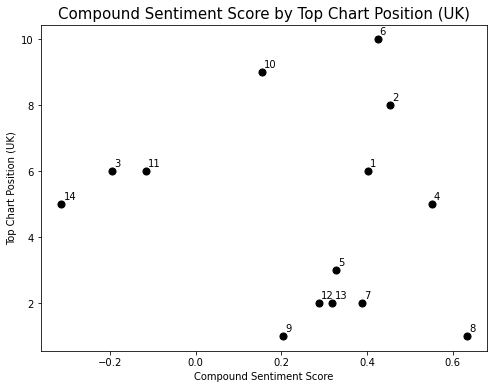

In [39]:
annotations=['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

plt.figure(figsize = (8,6))
plt.scatter(dmdata.Compound, dmdata.UK, s = 50, color = 'black')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Top Chart Position (UK)')
plt.title('Compound Sentiment Score by Top Chart Position (UK)', fontsize = 15)
for i, label in enumerate(annotations):
    plt.annotate(label, (dmdata.Compound[i] + 0.005, dmdata.UK[i] + 0.15))

plt.show()

Give the United Kingdom is their home country, there isn't much surprise that every one of their albums cracked the top 10. But there seems to be no correlation between the sentiment of the album and where it charted. The randomness of this data suggests that the chart position is based on other factors not captured in the data available. 

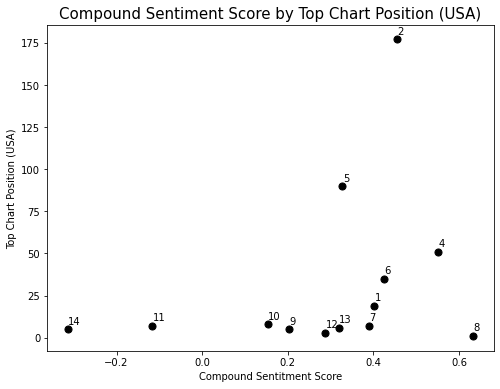

In [40]:
annotations=['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

plt.figure(figsize = (8,6))
plt.scatter(dmdata.Compound, dmdata.USA, s = 50, color = 'black')
plt.xlabel('Compound Sentitment Score')
plt.ylabel('Top Chart Position (USA)')
plt.title('Compound Sentiment Score by Top Chart Position (USA)', fontsize = 15)
for i, label in enumerate(annotations):
    plt.annotate(label, (dmdata.Compound[i] + 0.001, dmdata.USA[i] + 3))

plt.show()

Like the UK plot, there seems to be no discernable correlation between the sentiment of the album and its popularity. Rather, there is more correlation with time, as the later albums chart higher than the earlier albums.

## 4. What are the most frequent words in each album?

For each album, I ran the songs through a word frequency function I created that return a list of the most frequent words and their frequency (in this case, I used the top 10). I also used a function to create a word cloud for each album. 

In [41]:
# Prints the top number of words specified in the function call and returns their frequency.
def wordfrequency(album, num):
    albumFD = nltk.FreqDist(album)
    top_words = albumFD.most_common(num)
    
    return(top_words)
    

In [42]:
# Creates a word cloud for a list of lyrics.
def cloudmaker(album):
    text = ' '.join(album)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

Speak And Spell 

pretty 25
get 23
hey 19
enough 18
boy 17
know 14
tora 12
say 10
boys 10
disco 10


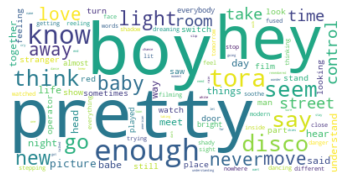

A Broken Frame 

secret 12
love 12
see 9
could 8
like 8
say 7
want 7
anymore 7
know 7
meaning 7


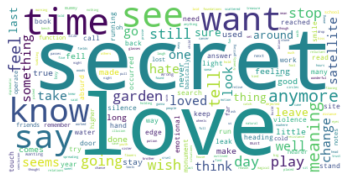

Construction Time Again 

stitch 12
time 11
everything 11
love 9
hands 9
grabbing 8
grab 8
get 7
world 7
counts 7


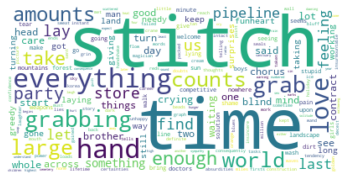

Some Great Reward 

lot 31
want 23
like 15
life 14
master 14
servant 14
got 13
come 12
let 10
think 9


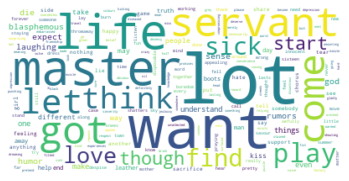

Black Celebration 

question 26
touch 17
change 17
let 15
black 15
come 15
together 12
see 11
like 10
us 9


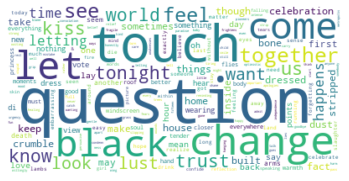

Music For The Masses 

nothing 27
give 17
know 14
never 12
want 12
love 12
strangelove 12
little 11
oh 11
trying 10


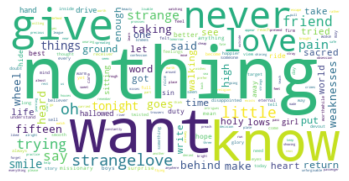

Violator 

put 14
know 14
touch 12
fall 12
reach 11
let 10
world 9
faith 9
someone 9
clean 9


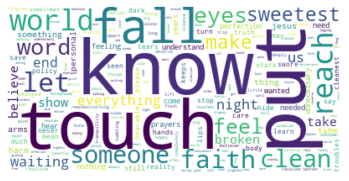

Songs Of Faith And Devotion 

love 25
try 16
walking 16
shoes 16
feel 13
favourite 12
moved 11
higher 10
want 9
take 8


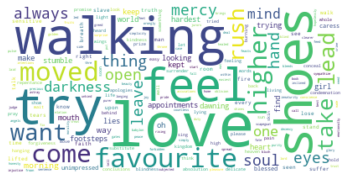

Ultra 

love 17
say 12
sister 12
time 11
feel 10
let 9
night 7
spirit 7
open 6
go 6


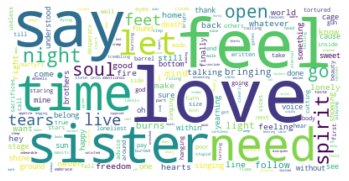

Exciter 

love 29
soul 19
heard 14
free 13
feel 12
like 11
comatose 11
night 9
shine 9
dream 8


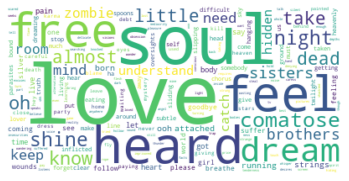

Playing The Angel 

oh 16
bye 16
one 14
lilian 11
give 10
seven 10
well 9
believe 9
john 9
revelator 9


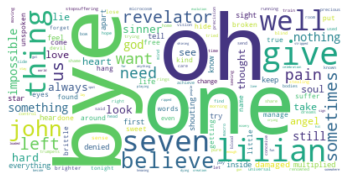

Sounds Of The Universe 

wrong 64
come 24
chains 18
back 16
little 15
know 12
something 12
way 11
eyes 11
love 10


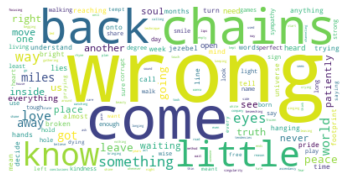

Delta Machine 

one 50
way 41
soul 26
soothe 18
could 17
slow 16
love 15
got 13
oh 12
want 10


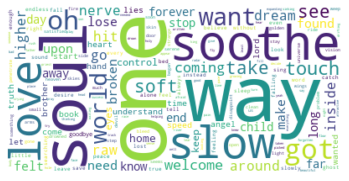

Spirit 

oh 25
nothing 22
time 21
hey 21
inside 18
get 17
board 15
way 15
feel 13
like 13


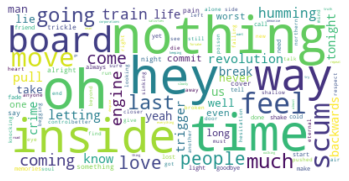

In [43]:
# Prints the 10 most frequent words and a wordcloud for each album
for i in range(0,14):
    print(name[i], '\n')
    for word, freq in wordfrequency(dmtoken[i], 10):
        print(word, freq)
    cloudmaker(dmtoken[i])
    

Looking at the frequency of words for the albums, it's a little easier to see why the sentiment scores are positive for most of the albums. The word "love" appears in the most frequent words list in 8 of the 14 albums (with it being the most frequent word in 3 of them). Love is a common theme in Depeche Mode songs, but that is not a guarantee that it is always in a positive context. In most of these cases, these words appear in the chorus of the song and are repeated multiple times. 

# Conclusion and Next Steps

I began this report expecting the following results:

1.	The overall sentiment of Depeche Modes lyrics would be negative.

2.	The more negative albums would be more popular as many Depeche Mode fans (including myself) are drawn to the dark themes of their music. 

Neither of these hypotheses were supported by the data, which leads me to believe that the sentiment of a song does not always convey the message of a song and that doing analysis on song lyrics is much different than for a novel or a speech. There are many elements that the lyrics alone can’t capture, such as the tempo and key of the song, that play the vital role in the songs overall theme.

This report opens the door for future research. Only one sentiment analysis method was used for simplicity, but it would be a good idea to try out different sentiment methods and compare the results. There is also room to dive deeper into the discography. Not only doing a more targeted analysis on the songs themselves, but comparing the sentiment of singles to non-singles, as well as the comparing the choruses to the verses.

Finally, more experimentation can be done with word tokenization. We were barley introduced to the concept of n-grams in this class, but they might be useful in tokenizing things like poems and songs where words and phrases are repeated. Given that this is the case in many Depeche Mode songs, incorporating n-grams into the tokenization process might reveal new insights into the content of their lyrics.


# Sources and References

Main sources of data:

https://www.lyrics.com/

http://archives.depechemode.com/discography/

Referenced for my sentiment analysis code and some of my plots:

https://towardsdatascience.com/how-to-analyze-emotions-and-words-of-the-lyrics-from-your-favorite-music-artist-bbca10411283

Referenced to help create the word clouds:

https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

Helped with some of the plot features:

https://www.delftstack.com/howto/matplotlib/matplotlib-label-scatter-plot-points/

Resources for the "gensim" module:

https://radimrehurek.com/gensim/

https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4